In [49]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
#import allel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import ternary

import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

In [4]:
ts = msprime.sim_ancestry(3)
ts

In [2]:
N = 10
demography = msprime.Demography.stepping_stone_model(
    [100] * N,
    migration_rate=0.1,
    boundaries=True)
ts = msprime.sim_ancestry({0: 3, N - 1: 3}, demography=demography)
ts

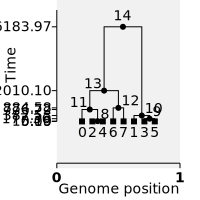

In [32]:
ts = msprime.sim_ancestry(4, population_size=1000, random_seed=1234)
SVG(ts.draw_svg(y_axis=True))

14.0	('A', 'C')	[0 1 1 0]
15.0	('G', 'A')	[0 1 1 0]
33.0	('T', 'A')	[1 0 0 0]
34.0	('T', 'A')	[1 0 0 1]
42.0	('G', 'C')	[0 1 1 0]
96.0	('G', 'T')	[1 0 0 1]
118.0	('A', 'T')	[1 0 0 0]
122.0	('G', 'T')	[1 0 0 1]
133.0	('C', 'G')	[0 1 1 0]
135.0	('G', 'A', 'T')	[2 1 1 0]
139.0	('C', 'A')	[1 0 0 1]
148.0	('A', 'G')	[0 1 1 0]
163.0	('G', 'C')	[1 0 0 1]
181.0	('C', 'T')	[0 1 1 0]
191.0	('C', 'G')	[1 0 0 0]
202.0	('T', 'A')	[0 1 1 0]
205.0	('T', 'G')	[0 1 1 0]
206.0	('A', 'T')	[0 1 1 0]
215.0	('T', 'A')	[1 0 0 1]
220.0	('A', 'T')	[0 1 1 0]
226.0	('T', 'A')	[0 1 1 0]
232.0	('G', 'C')	[0 1 1 0]
233.0	('C', 'T', 'A')	[2 0 0 2]
235.0	('T', 'G')	[0 1 1 0]
240.0	('T', 'A')	[0 1 1 0]
242.0	('A', 'G', 'T')	[1 2 2 1]
247.0	('A', 'G')	[0 1 1 0]
250.0	('A', 'C')	[1 0 0 1]
255.0	('G', 'A')	[0 1 1 0]
260.0	('T', 'A')	[0 1 1 0]
283.0	('T', 'A')	[0 0 0 1]
288.0	('A', 'T')	[1 0 0 0]
295.0	('A', 'T')	[1 0 0 1]
330.0	('C', 'T')	[0 0 0 1]
340.0	('G', 'T')	[0 1 1 0]
383.0	('T', 'C')	[0 1 1 0]
399.0	('C', 'A')	[1

5734.0	('G', 'T')	[1 0 0 1]
5751.0	('G', 'T')	[0 1 1 0]
5763.0	('T', 'C')	[0 1 1 0]
5786.0	('A', 'G')	[0 1 1 0]
5831.0	('T', 'A')	[0 1 1 0]
5835.0	('C', 'A')	[0 1 1 0]
5839.0	('G', 'C')	[0 1 1 0]
5856.0	('T', 'G')	[0 1 1 0]
5859.0	('G', 'T')	[1 0 0 0]
5868.0	('G', 'T')	[1 0 0 1]
5874.0	('A', 'T')	[1 0 0 1]
5875.0	('C', 'T')	[0 1 1 0]
5886.0	('A', 'C')	[0 1 1 0]
5892.0	('T', 'G')	[1 0 0 0]
5904.0	('C', 'A')	[0 0 0 1]
5907.0	('G', 'C')	[0 1 1 0]
5909.0	('C', 'A')	[0 1 1 0]
5919.0	('T', 'G')	[1 0 0 1]
5929.0	('G', 'A')	[1 0 0 1]
5932.0	('A', 'G')	[1 0 0 1]
5933.0	('T', 'A')	[0 1 1 0]
5942.0	('G', 'C')	[1 0 0 0]
5951.0	('T', 'C')	[1 0 0 1]
5963.0	('T', 'A')	[0 1 1 0]
5968.0	('T', 'G')	[0 1 1 0]
5977.0	('T', 'G')	[0 1 1 0]
5978.0	('A', 'G')	[0 1 1 0]
5980.0	('G', 'T')	[1 0 0 0]
5982.0	('C', 'G')	[0 1 0 0]
5986.0	('T', 'A')	[0 0 0 1]
5992.0	('A', 'C')	[1 0 0 0]
5994.0	('T', 'A')	[1 0 0 0]
5996.0	('A', 'C')	[1 0 0 0]
6001.0	('A', 'G')	[0 1 1 0]
6002.0	('G', 'C')	[1 0 0 0]
6005.0	('G', 'T')	[1

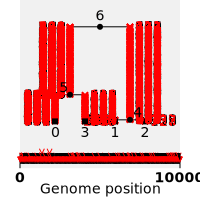

In [42]:
ts = msprime.sim_ancestry(2, sequence_length=10000, random_seed=1234)
mts = msprime.sim_mutations(ts, rate=0.01, random_seed=5678)
#SVG(mts.draw_svg())

for var in mts.variants():
    print(var.site.position, var.alleles, var.genotypes, sep="\t")
    
SVG(mts.draw_svg())

In [26]:
SVG(mts.haplotypes)

TypeError: a bytes-like object is required, not 'method'

In [48]:
for var in mts.variants():
    hap=var.genotypes
    if hap == [0 1 1 0]:
        print(yes)
    break
    
print(hap) 

SyntaxError: invalid syntax (2370893143.py, line 3)

In [50]:
uid = "1r7AYOFEw9RgU0QaagxkHuECvfoegQWp9spQtMV8XJGI"
url = f"https://docs.google.com/spreadsheets/d/{uid}/export?format=csv"

In [51]:
import pandas as pd

df = pd.read_csv(url)  # Line 1.

In [52]:
cols = ['Carbonate', 'Quartz', 'Matrix']

for col in cols:
    df[col[0]] = df[col] * 100 / df[cols].sum(axis=1)

In [86]:
#fig 1 B cartoon
ternar=[[33,33,33],[0,100,0],[20,10,70]]
print(ternar)

[[33, 33, 33], [0, 100, 0], [20, 10, 70]]


In [ ]:
rank_counts = collections.Counter(t.rank() for t in ts.trees())

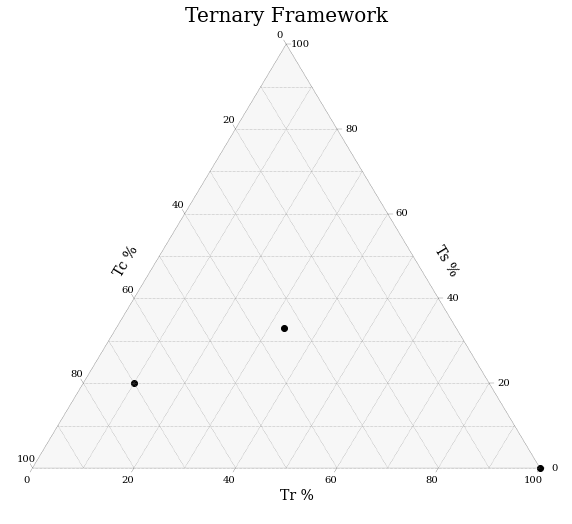

In [83]:
# Set up the figure.
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plot points.
tax.scatter(ternar,color="black")

# Axis labels. (See below for corner labels.)
fontsize = 14
offset = 0.08
tax.left_axis_label("Tc %", fontsize=fontsize, offset=offset)
tax.right_axis_label("Ts %", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Tr %", fontsize=fontsize, offset=-offset)
tax.set_title("Ternary Framework", fontsize=20)

# Decoration.
tax.boundary(linewidth=0.1)
tax.gridlines(multiple=10, color="grey")
tax.ticks(axis='lbr', linewidth=0.2, multiple=20)
tax.get_axes().axis('off')

tax.show()

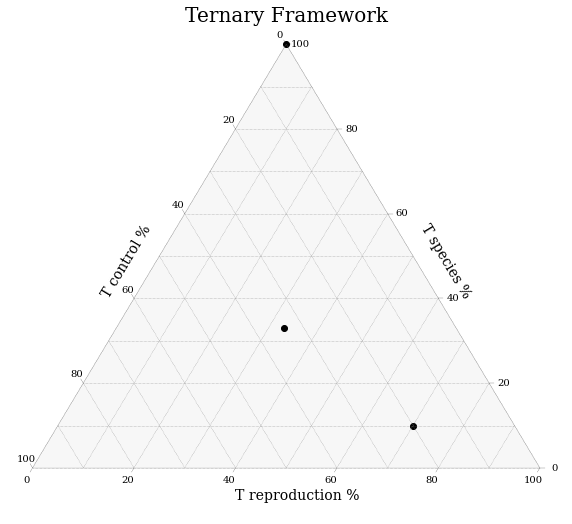

In [92]:
def tern_plot(data):
    # Set up the figure.
    fig, tax = ternary.figure(scale=100)
    fig.set_size_inches(10, 9)

    # Plot points.
    tax.scatter(data,color="black")

    # Axis labels. (See below for corner labels.)
    fontsize = 14
    offset = 0.08
    tax.left_axis_label("T control %", fontsize=fontsize, offset=offset)
    tax.right_axis_label("T species %", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("T reproduction %", fontsize=fontsize, offset=-offset)
    tax.set_title("Ternary Framework", fontsize=20)

    # Decoration.
    tax.boundary(linewidth=0.1)
    tax.gridlines(multiple=10, color="grey")
    tax.ticks(axis='lbr', linewidth=0.2, multiple=20)
    tax.get_axes().axis('off')

#tax.show()

tern_plot([[33,33,33],[0,100,0],[70,10,20]])

In [96]:
def compareList(l1,l2):
   #l1.sort()
   #l2.sort()
   if (l1==l2):
      return "Equal"
   else:
      return "Non equal"
l1=[1,2,3]
l2=[2,1,3]
print("First comparison",compareList(l1,l2))
l3=[1,2,3]
l4=[1,2,4]
print("Second comparison",compareList(l3,l4))
l5=[1,2,3]
l6=[1,2,3]
print("Second comparison",compareList(l5,l6))

First comparison Non equal
Second comparison Non equal
Second comparison Equal


In [107]:
l1=[0,1,1,0]

for var in mts.variants():
    #hap=var.genotypes
    print(var.genotypes)
    if (hap==l1):
        print("topology C")
    #else:
        #print("topology R")
    
#print(hap) 

[0 1 1 0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [110]:
mts.variants()

<generator object TreeSequence.variants at 0x166bd5430>

In [39]:
for var in mts.variants():

<generator object TreeSequence.variants at 0x1653c7350>

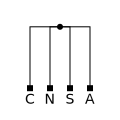

(0, 0)


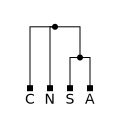

(1, 0)


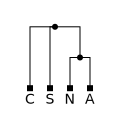

(1, 1)


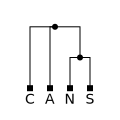

(1, 2)


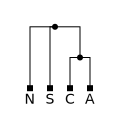

(1, 3)


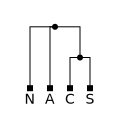

(1, 4)


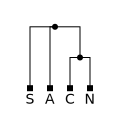

(1, 5)


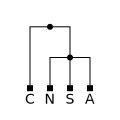

(2, 0)


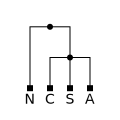

(2, 1)


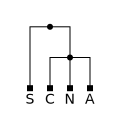

(2, 2)


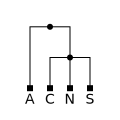

(2, 3)


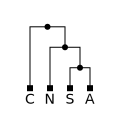

(3, 0)


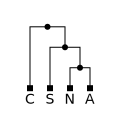

(3, 1)


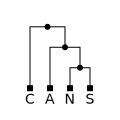

(3, 2)


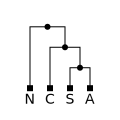

(3, 3)


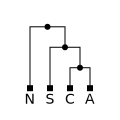

(3, 4)


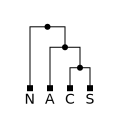

(3, 5)


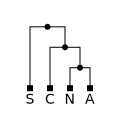

(3, 6)


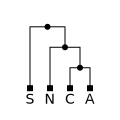

(3, 7)


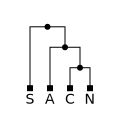

(3, 8)


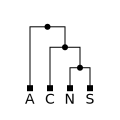

(3, 9)


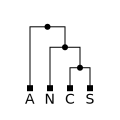

(3, 10)


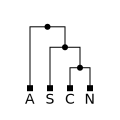

(3, 11)


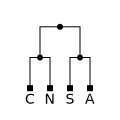

(4, 0)


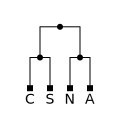

(4, 1)


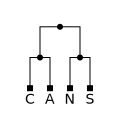

(4, 2)


In [135]:
for t in tskit.all_trees(num_leaves=4):
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "N", 2: "S",3:"A"}, order="tree", size=(120, 120))))
    print(t.rank())

In [147]:
ranks = [t.rank() for t in tskit.all_trees(num_leaves=4)]
print("Ranks of 3-leaf trees:", len(ranks))

Ranks of 3-leaf trees: 26


Visualizing rank (3, 0)


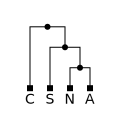

Visualizing rank (3, 1)


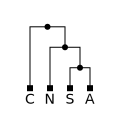

Visualizing rank (3, 2)


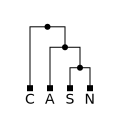

In [142]:
for rank in [(3,0), (3, 1), (3, 2)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

Visualizing rank (3, 11)


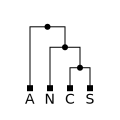

Visualizing rank (3, 1)


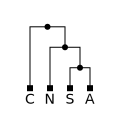

Visualizing rank (3, 2)


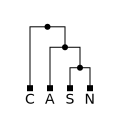

In [162]:
for rank in [(3,11), (3, 1), (3, 2)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

In [151]:
ts = msprime.sim_ancestry(2, sequence_length=1000) #, random_seed=1234)
mts = msprime.sim_mutations(ts, rate=0.01) #, random_seed=5678)
rank_counts = [print(t.rank()) for t in ts.trees()]
#print(rank_counts)

#rank_counts = collections.Counter(t.rank() for t in ts.trees())

(3, 10)


(3, 8)


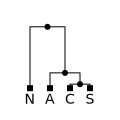

In [165]:
ts = msprime.sim_ancestry(2, sequence_length=1000) #, random_seed=1234)
mts = msprime.sim_mutations(ts, rate=0.01) #, random_seed=5678)
for t in ts.trees():
    print(t.rank())
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

In [166]:
num_replicates = 100
tmrca = np.zeros(num_replicates)
replicates = msprime.sim_ancestry(10, num_replicates=num_replicates, random_seed=42)
for replicate_index, ts in enumerate(replicates):
    tree = ts.first()
    tmrca[replicate_index] = tree.time(tree.root)
np.mean(tmrca), np.var(tmrca)

(3.799291711240622, 3.920289255957004)

In [195]:
def sim_replicates(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=1,
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=1e-6)
        yield mutated_ts

In [196]:
num_replicates = 10000
#ranks = np.zeros(num_replicates)
ranks=[]
for replicate_index, ts in enumerate(sim_replicates(num_replicates)):
    for t in ts.trees():
        #print(t.rank())
        ranks+=[t.rank()]
    #break
        #display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))
    
    #S[replicate_index] = ts.segregating_sites(span_normalise=False, mode="site")
# Show the mean and variance of S
#(np.mean(S), np.var(S))

print(ranks)

[(4, 0), (3, 2), (3, 4), (3, 11), (3, 8), (3, 7), (4, 1), (3, 5), (4, 2), (3, 10), (3, 11), (4, 2), (4, 2), (3, 11), (3, 3), (4, 1), (3, 4), (3, 6), (3, 0), (3, 6), (3, 8), (3, 10), (3, 10), (3, 8), (4, 2), (3, 6), (3, 1), (3, 11), (4, 1), (4, 0), (3, 10), (4, 1), (3, 0), (3, 3), (4, 1), (3, 10), (4, 1), (3, 8), (3, 7), (3, 6), (3, 0), (4, 0), (3, 5), (3, 5), (4, 2), (4, 0), (3, 11), (3, 1), (4, 2), (3, 1), (3, 3), (3, 9), (3, 1), (4, 0), (3, 5), (3, 4), (3, 4), (3, 4), (3, 4), (3, 5), (3, 0), (4, 2), (3, 4), (3, 4), (4, 2), (4, 2), (3, 9), (3, 0), (3, 5), (4, 1), (3, 8), (3, 2), (3, 8), (3, 11), (4, 1), (3, 7), (3, 6), (3, 8), (3, 3), (4, 1), (3, 2), (3, 4), (3, 8), (3, 9), (4, 1), (3, 2), (3, 2), (3, 3), (3, 5), (4, 1), (4, 1), (3, 11), (3, 2), (3, 11), (4, 0), (3, 11), (4, 1), (3, 1), (3, 11), (4, 0), (3, 6), (4, 2), (4, 0), (4, 1), (4, 1), (4, 0), (3, 6), (3, 8), (3, 11), (3, 1), (3, 1), (4, 2), (4, 1), (3, 3), (4, 0), (4, 2), (4, 2), (3, 3), (4, 0), (3, 0), (4, 1), (3, 10), (3, 11

In [208]:
rank_counts = collections.Counter(ranks)
print(rank_counts)
rank_counts()


Counter({(4, 0): 1138, (4, 1): 1133, (4, 2): 1102, (3, 10): 580, (3, 4): 570, (3, 0): 568, (3, 6): 564, (3, 5): 559, (3, 9): 558, (3, 2): 552, (3, 8): 540, (3, 3): 540, (3, 1): 540, (3, 7): 536, (3, 11): 520})


TypeError: 'Counter' object is not callable

Most frequent topology


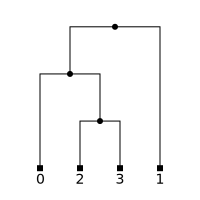

In [164]:
import collections
import msprime
# Simulate a tree sequence with 2 diploid individuals (i.e. 4 samples)
ts = msprime.sim_ancestry(2, sequence_length=1e8, recombination_rate=1e-7, random_seed=1)
rank_counts = collections.Counter(t.rank() for t in ts.trees())
most_freq_rank, count = rank_counts.most_common(1)[0]
most_freq_topology = tskit.Tree.unrank(ts.num_samples, most_freq_rank)
print("Most frequent topology")
display(SVG(most_freq_topology.draw_svg(node_labels={0: 0, 1: 1, 2: 2, 3: 3})))

In [15]:
for tree in ts.trees():
    print(f"Tree {tree.index} covers {tree.interval}")
    if tree.index >= 4:
        print("...")
        break
print(f"Tree {ts.last().index} covers {ts.last().interval}")

Tree 0 covers Interval(left=0.0, right=1.0)
Tree 0 covers Interval(left=0.0, right=1.0)


In [9]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population(name="B", initial_size=5_000)
demography.add_population(name="C", initial_size=1_000)
demography.add_population_split(time=1000, derived=["A", "B"], ancestral="C")
ts = msprime.sim_ancestry(samples={"A": 1, "B": 1}, demography=demography, random_seed=12)
ts

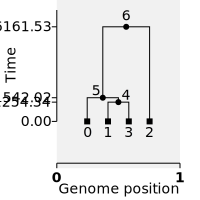

In [5]:
SVG(ts.draw_svg(y_axis=True))